In [1]:
# root directory
root_path = f"../../../../"

In [2]:
import pandas as pd

In [3]:
# Load data
df_mx_solvent_data_labeled = pd.read_pickle(f"{root_path}/data/updated/dataset_mx_solvent_hsp.pkl")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(997, 65)


,mx,label,inchikey,gap_oh,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,alphaz_el_oh,...,isotope_atom_count,atom_stereo_count,bond_stereo_count,covalent_unit_count,boiling_point,mmhg,solvent,method_hf,method_licl/hf,method_lif/hcl
0,Ti3C2,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,0,0,0,1,373.2,760.0,oxidane,True,False,False
1,Ti3C2,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,0,0,0,1,351.5,760.0,ethanol,True,False,False
2,Ti3C2,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,0,0,0,1,337.8,760.0,methanol,True,False,False
3,Ti3C2,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,0,0,0,1,329.3,760.0,propan-2-one,True,False,False
4,Ti3C2,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,0,0,0,1,354.8,760.0,acetonitrile,True,False,False


In [4]:
cols_to_keep = [col for col in df_mx_solvent_data_labeled.columns if not (df_mx_solvent_data_labeled[col].nunique() <= 1)]
df_mx_solvent_data_labeled = df_mx_solvent_data_labeled[cols_to_keep]

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [6]:
df_mx_solvent_data_labeled['method_hf'] = df_mx_solvent_data_labeled['method_hf'].astype('category').cat.codes
df_mx_solvent_data_labeled['method_licl/hf'] = df_mx_solvent_data_labeled['method_licl/hf'].astype('category').cat.codes
df_mx_solvent_data_labeled['method_lif/hcl'] = df_mx_solvent_data_labeled['method_lif/hcl'].astype('category').cat.codes

In [7]:
df_mx_solvent_data_labeled.head()

,mx,label,inchikey,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,alphaz_el_oh,plasmafrequency_x_oh,...,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point,solvent,method_hf,method_licl/hf,method_lif/hcl
0,Ti3C2,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,...,1,1,0,1,0,373.2,oxidane,1,0,0
1,Ti3C2,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,...,1,1,0,3,0,351.5,ethanol,1,0,0
2,Ti3C2,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,...,1,1,0,2,0,337.8,methanol,1,0,0
3,Ti3C2,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,...,0,1,0,4,0,329.3,propan-2-one,1,0,0
4,Ti3C2,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,...,0,1,0,3,0,354.8,acetonitrile,1,0,0


In [8]:
df_mx_solvent_data_labeled.columns

Index(['mx', 'label', 'inchikey', 'work_function_oh', 'formation_energy_oh',
       'ehull_oh', 'alphax_el_oh', 'alphay_el_oh', 'alphaz_el_oh',
       'plasmafrequency_x_oh', 'plasmafrequency_y_oh',
       'has_inversion_symmetry_oh', 'gap_o', 'work_function_o',
       'formation_energy_o', 'ehull_o', 'alphax_el_o', 'alphay_el_o',
       'alphaz_el_o', 'plasmafrequency_x_o', 'plasmafrequency_y_o',
       'has_inversion_symmetry_o', 'work_function_f', 'formation_energy_f',
       'ehull_f', 'alphax_el_f', 'alphay_el_f', 'alphaz_el_f',
       'plasmafrequency_x_f', 'plasmafrequency_y_f',
       'has_inversion_symmetry_f', 'delta_d', 'delta_p', 'delta_h',
       'molar_volume', 'molecular_weight', 'xlogp', 'tpsa', 'complexity',
       'h_bond_donor_count', 'h_bond_acceptor_count', 'rotatable_bond_count',
       'heavy_atom_count', 'atom_stereo_count', 'boiling_point', 'solvent',
       'method_hf', 'method_licl/hf', 'method_lif/hcl'],
      dtype='object')

In [9]:
features = ['work_function_oh', 'formation_energy_oh',
       'ehull_oh', 'alphax_el_oh', 'alphay_el_oh', 'alphaz_el_oh',
       'plasmafrequency_x_oh', 'plasmafrequency_y_oh',
       'has_inversion_symmetry_oh', 'gap_o', 'work_function_o',
       'formation_energy_o', 'ehull_o', 'alphax_el_o', 'alphay_el_o',
       'alphaz_el_o', 'plasmafrequency_x_o', 'plasmafrequency_y_o',
       'has_inversion_symmetry_o', 'work_function_f', 'formation_energy_f',
       'ehull_f', 'alphax_el_f', 'alphay_el_f', 'alphaz_el_f',
       'plasmafrequency_x_f', 'plasmafrequency_y_f',
       'has_inversion_symmetry_f', 'delta_d', 'delta_p', 'delta_h',
       'molar_volume',
       'molecular_weight', 'xlogp', 'tpsa', 'complexity', 'h_bond_donor_count',
       'h_bond_acceptor_count', 'rotatable_bond_count', 'heavy_atom_count',
       'atom_stereo_count', 'boiling_point', 'method_hf',
       'method_licl/hf', 'method_lif/hcl']
X = df_mx_solvent_data_labeled[features]
y = df_mx_solvent_data_labeled['label']

In [10]:
X.head()

,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,alphaz_el_oh,plasmafrequency_x_oh,plasmafrequency_y_oh,has_inversion_symmetry_oh,gap_o,...,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point,method_hf,method_licl/hf,method_lif/hcl
0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,0.0,1,1,0,1,0,373.2,1,0,0
1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2.8,1,1,0,3,0,351.5,1,0,0
2,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2.0,1,1,0,2,0,337.8,1,0,0
3,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,26.3,0,1,0,4,0,329.3,1,0,0
4,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,29.3,0,1,0,3,0,354.8,1,0,0


In [11]:
y.head()

0    1
1    1
2   -1
3   -1
4   -1
Name: label, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def plot_feature_distributions(data, features, title, plots_per_row=4):
    num_features = len(features)
    num_rows = (num_features + plots_per_row - 1) // plots_per_row
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 4, num_rows * 3))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.histplot(data[feature], kde=True, ax=axes[i], bins=30, color='skyblue')
        axes[i].set_title(f"{title}: {feature}")

    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

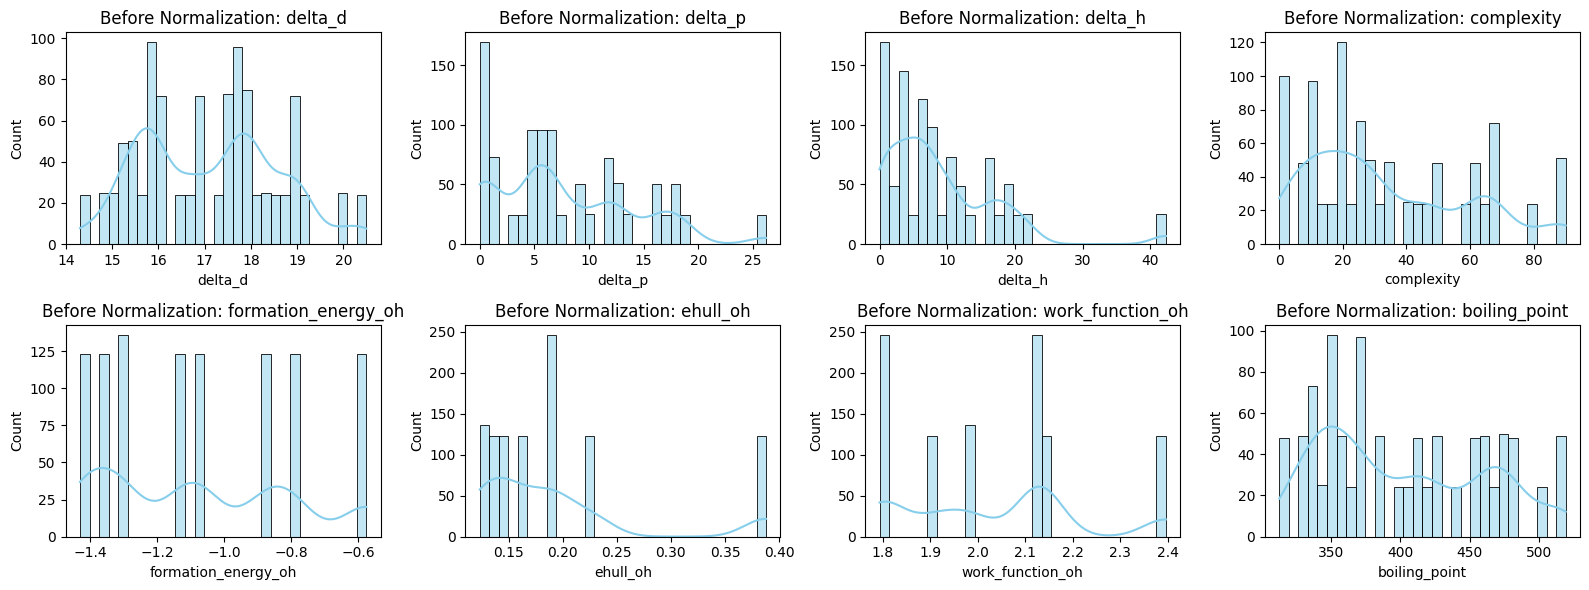

In [14]:
plot_feature = ['delta_d', 'delta_p', 'delta_h',
       'complexity',
   'formation_energy_oh','ehull_oh', 'work_function_oh',
   'boiling_point']
plot_feature_distributions(X, plot_feature, "Before Normalization")

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

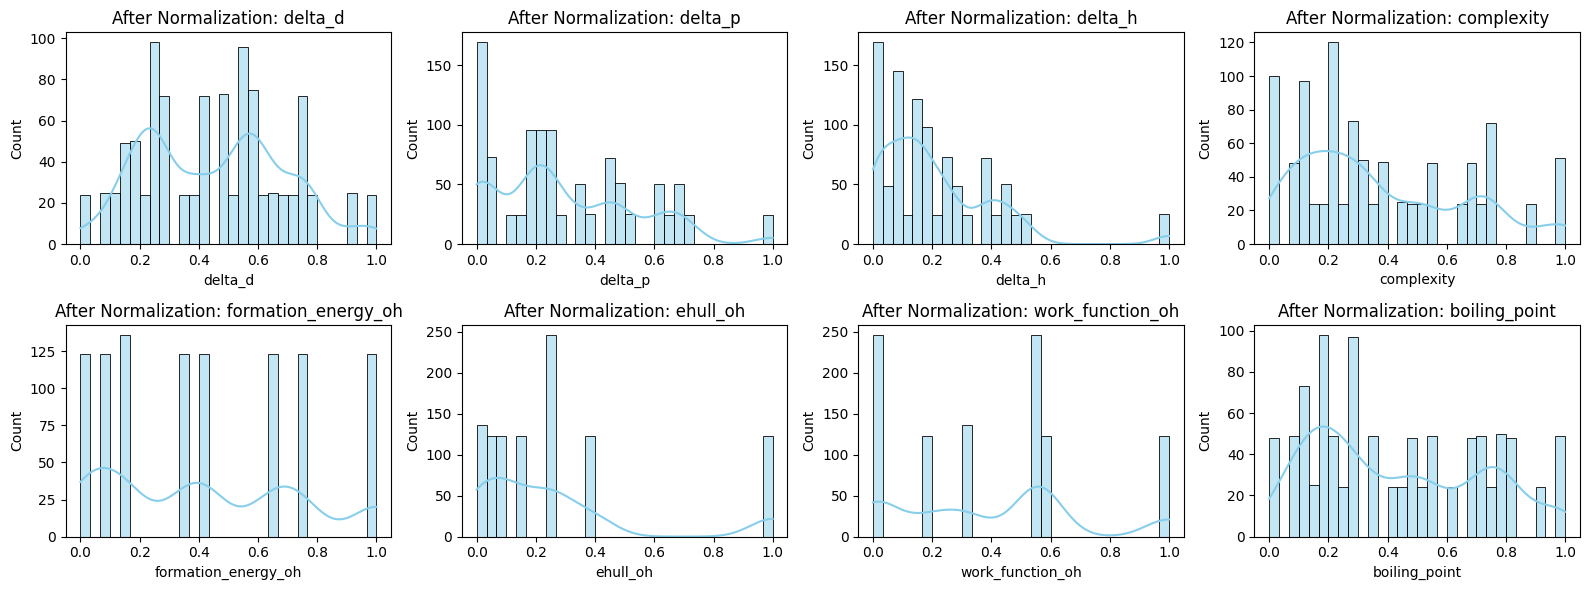

In [17]:
plot_feature_distributions(X_scaled_df, plot_feature, "After Normalization")

In [18]:
mask_pos = y == 1
mask_neg = y == -1
mask_unlabeled = y == 0


In [33]:
# PCA for inputs
pca = PCA(n_components=None, random_state=42)
pca.fit(X_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42


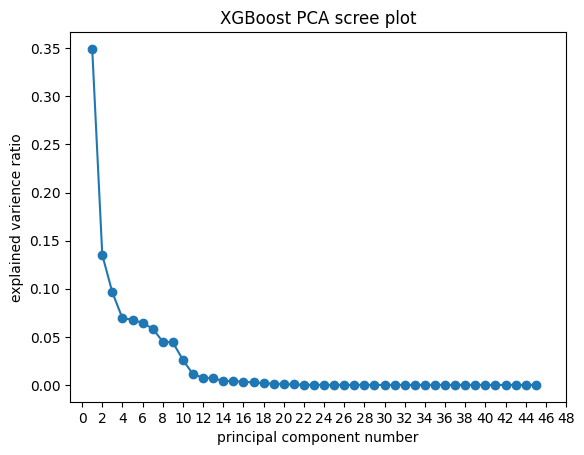

In [36]:
# scree plot
explained_variance = pca.explained_variance_ratio_
component_numbers = np.arange(len(explained_variance)) + 1
plt.plot(component_numbers, explained_variance, marker='o')
plt.xlabel('principal component number')
plt.ylabel('explained varience ratio')
plt.title('XGBoost PCA scree plot')
plt.xticks(np.arange(0, 50, step=2))
plt.show()

In [67]:
pca = PCA(n_components=12, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [68]:
X_train = X_pca[mask_pos | mask_neg]
y_train = y[mask_pos | mask_neg]

In [69]:
X_test = X_pca[mask_unlabeled]
df_unlabeled = df_mx_solvent_data_labeled[mask_unlabeled].copy()

In [70]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [71]:
print(len(X_train_train))
print(len(X_val))
print(len(y_train_train))
print(len(y_val))

66
17
66
17


In [72]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform
import xgboost as xgb

In [73]:
param_dist = {
    'estimator__max_depth': randint(3, 10),
    'estimator__learning_rate': uniform(0.01, 0.3),
    'estimator__n_estimators': randint(50, 200),
    'estimator__subsample': uniform(0.6, 0.4),
    'estimator__colsample_bytree': uniform(0.6, 0.4)
}

In [74]:
base_rf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)
bagging_clf = BaggingClassifier(estimator=base_rf, n_estimators=10, random_state=42)

In [75]:
rand_search = RandomizedSearchCV(
    estimator=bagging_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1
)
rand_search.fit(X_train_train, y_train_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END estimator__colsample_bytree=0.749816047538945, estimator__learning_rate=0.2952142919229748, estimator__max_depth=5, estimator__n_estimators=121, estimator__subsample=0.8394633936788146; total time=   0.2s
[CV] END estimator__colsample_bytree=0.749816047538945, estimator__learning_rate=0.2952142919229748, estimator__max_depth=5, estimator__n_estimators=121, estimator__subsample=0.8394633936788146; total time=   0.2s
[CV] END estimator__colsample_bytree=0.749816047538945, estimator__learning_rate=0.2952142919229748, estimator__max_depth=5, estimator__n_estimators=121, estimator__subsample=0.8394633936788146; total time=   0.2s
[CV] END estimator__colsample_bytree=0.749816047538945, estimator__learning_rate=0.2952142919229748, estimator__max_depth=5, estimator__n_estimators=121, estimator__subsample=0.8394633936788146; total time=   0.2s
[CV] END estimator__colsample_bytree=0.749816047538945, estimator__learning_rate=0

,estimator,BaggingClassi...ndom_state=42)
,param_distributions,"{'estimator__colsample_bytree': <scipy.stats....002D79EC1EA80>, 'estimator__learning_rate': <scipy.stats....002D7A105BE50>, 'estimator__max_depth': <scipy.stats....002D798EA7460>, 'estimator__n_estimators': <scipy.stats....002D7982C45A0>, ...}"
,n_iter,30
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [76]:
best_model = rand_search.best_estimator_
print(best_model)

BaggingClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=np.float64(0.749816047538945),
                                          device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='logloss',
                                          feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=

In [77]:
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Val Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Report:\n", classification_report(y_val, y_val_pred))

Train Accuracy: 0.963855421686747
Val Accuracy: 0.8823529411764706
Validation Report:
               precision    recall  f1-score   support

          -1       0.80      1.00      0.89         8
           1       1.00      0.78      0.88         9

    accuracy                           0.88        17
   macro avg       0.90      0.89      0.88        17
weighted avg       0.91      0.88      0.88        17



In [78]:
proba_unlabeled = best_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive)
df_unlabeled['predicted_proba'] = proba_unlabeled
df_unlabeled['predicted_label'] = (proba_unlabeled >= 0.5).astype(int)

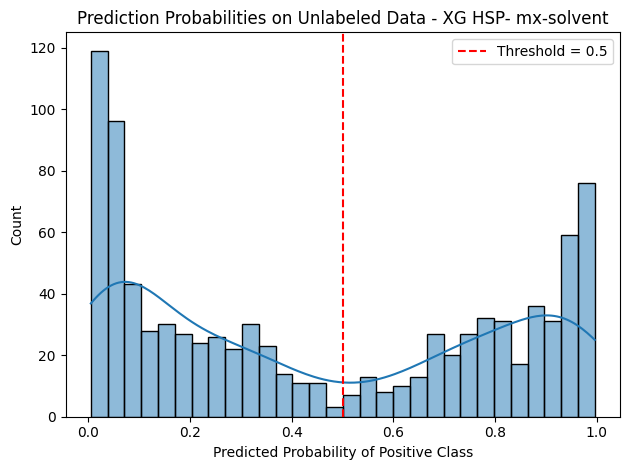

In [81]:
sns.histplot(proba_unlabeled, bins=30, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Prediction Probabilities on Unlabeled Data - XG HSP- mx-solvent")
plt.xlabel("Predicted Probability of Positive Class")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [83]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
top_10 = high_conf.sort_values(by='predicted_proba', ascending=False).head(20)
print(top_10[['solvent', 'mx', 'predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])

                   solvent     mx  predicted_proba  method_lif/hcl  \
177           oxolan-2-one  Nb2C1         0.995972               0   
217           oxolan-2-one  Nb2C1         0.995518               1   
157              formamide  Nb2C1         0.992884               0   
238              formamide  Nb2C1         0.991569               0   
663           oxolan-2-one  Zr3C2         0.991388               0   
150  methylsulfinylmethane  Nb2C1         0.990838               0   
197              formamide  Nb2C1         0.990485               1   
258           oxolan-2-one  Nb2C1         0.989160               0   
399              formamide  Mo2C1         0.988995               0   
230  methylsulfinylmethane  Nb2C1         0.988813               0   
190  methylsulfinylmethane  Nb2C1         0.988233               1   
684              formamide  Zr3C2         0.987710               1   
481              formamide  Mo2C1         0.987625               0   
725              for

In [84]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.1]
bottom_10 = low_conf.sort_values(by='predicted_proba', ascending=True).head(20)

print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):")
print(bottom_10[['mx', 'solvent','predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])

MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):
        mx                solvent  predicted_proba  method_lif/hcl  \
534  Ti2C1  N,N-diethylethanamine         0.004851               0   
574  Ti2C1  N,N-diethylethanamine         0.005084               1   
820   V4C3                heptane         0.006389               1   
615  Ti2C1  N,N-diethylethanamine         0.006565               0   
804   V4C3                 hexane         0.006651               1   
576  Ti2C1                heptane         0.006692               1   
845   V4C3                 hexane         0.006780               0   
861   V4C3                heptane         0.006792               0   
601  Ti2C1                 hexane         0.006792               0   
617  Ti2C1                heptane         0.006896               0   
560  Ti2C1                 hexane         0.007093               1   
763   V4C3                 hexane         0.007292               0   
536  Ti2C1                hept

In [85]:
print("\n=== Summary of predicted probabilities on unlabeled data ===")
print(df_unlabeled['predicted_proba'].describe())

# Count how many samples fall into different confidence zones
bins = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
labels = ['Very Low (≤0.1)', 'Low (0.1–0.3)', 'Mid (0.3–0.5)',
          'High (0.5–0.7)', 'Very High (0.7–0.9)', 'Extremely High (>0.9)']

df_unlabeled['confidence_bin'] = pd.cut(df_unlabeled['predicted_proba'], bins=bins, labels=labels, include_lowest=True)
print("\n=== Prediction count by confidence bin ===")
print(df_unlabeled['confidence_bin'].value_counts().sort_index())


=== Summary of predicted probabilities on unlabeled data ===
count    914.000000
mean       0.453056
std        0.362472
min        0.004851
25%        0.078098
50%        0.354176
75%        0.819862
max        0.995972
Name: predicted_proba, dtype: float64

=== Prediction count by confidence bin ===
confidence_bin
Very Low (≤0.1)          257
Low (0.1–0.3)            157
Mid (0.3–0.5)             93
High (0.5–0.7)            80
Very High (0.7–0.9)      164
Extremely High (>0.9)    163
Name: count, dtype: int64


In [86]:
df_unlabeled.to_csv(f"005_p_vs_n_predictions_unlabeled_xg-normalize-fintune-pca-mxsolv.csv")
df_unlabeled.to_pickle(f"005_p_vs_n_predictions_unlabeled_xg-normalize-fintune-pca-mxsolv.pkl")
